Clustering Crypto

In [101]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from pathlib import Path
import altair as alt
from IPython.display import display

In [102]:
!pip install -U altair

In [103]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [104]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path)
print(crypto_df.shape)
crypto_df.describe()

(1252, 7)


,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


In [105]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


Data Preprocessing

In [106]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df['IsTrading'] = crypto_df['IsTrading'].astype(str)

bool_list = ['True']

crypto_df = crypto_df[crypto_df.IsTrading.isin(bool_list)]

crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   object 
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(6)
memory usage: 71.5+ KB


In [107]:
crypto_df.rename(columns = {'Unnamed: 0':'Ticker'}, inplace = True)
for col in crypto_df.columns:
    print(col)

Ticker
CoinName
Algorithm
IsTrading
ProofType
TotalCoinsMined
TotalCoinSupply


In [108]:
crypto_df.set_index("Ticker", inplace=True)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [109]:
# Keep only cryptocurrencies that are trading
non_trading = crypto_df[crypto_df["IsTrading"] == False].index
crypto_df.drop(non_trading , inplace=True)

crypto_df['TotalCoinsMined'].sum()

2835204541736.835

In [110]:
# Keep only cryptocurrencies with a working algorithm
crypto_df= crypto_df[crypto_df['Algorithm']!= 'N/A']

In [111]:
# Remove the "IsTrading" column
#df.drop(columns=['IsTrading'],inplace=True)

# crypto_df.iloc[:,:].isnull().sum()

# df.replace('0',' ')

# df.TotalCoinsMined.dropna()
crypto_df.drop(columns=['IsTrading'], inplace=True)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Ticker,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [112]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   ProofType        1144 non-null   object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.6+ KB


In [113]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna()

In [114]:
# Remove rows with cryptocurrencies having no coins mined
rypto_df= crypto_df[crypto_df["TotalCoinsMined"]>0]

In [115]:
# Drop rows where there are 'N/A' text values
crypto_df= crypto_df[crypto_df!='N/A']

In [116]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coins_name = pd.DataFrame(crypto_df['CoinName'])

coins_name
# y = coins_name['CoinName']

# y.head()

,CoinName
Ticker,
42,42 Coin
404,404Coin
808,808
1337,EliteCoin
BTC,Bitcoin
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex


In [117]:
y = coins_name['CoinName']
y.head()

Ticker
42        42 Coin
404       404Coin
808           808
1337    EliteCoin
BTC       Bitcoin
Name: CoinName, dtype: object

In [118]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
crypto_df.drop(columns='CoinName', inplace=True)

In [119]:
# Create dummy variables for text features
crypto_dummies= pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Ticker,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Standardize data
crypto_scaled= StandardScaler().fit_transform(crypto_dummies)
crypto_scaled

array([[-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.07661326, -0.03823825, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282804, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       ...,
       [-0.0784756 , -0.03823801, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10264677, -0.0382384 , -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596],
       [-0.10282485, -0.03823841, -0.03823596, ..., -0.03823596,
        -0.03823596, -0.03823596]])

Reducing Dimensions Using PCA

In [121]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [122]:
# Create a DataFrame with the principal components data
pca_df = pd.DataFrame(
         data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"]
)
pca_df.head()

,PC 1,PC 2,PC 3
0,-0.311909,1.223115,-0.395829
1,-0.298060,1.221307,-0.396157
2,-0.140324,0.793454,-0.275268
3,0.287620,1.871280,-0.456194
4,-0.161219,-1.456436,0.085173


Clustering Crytocurrencies Using K-Means
Find the Best Value for k Using the Elbow Curve

In [123]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\Users\gregg\Anaconda3\envs\pyvizenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

In [124]:
km = KMeans(n_clusters=4, random_state=0)
# Fit the model
km.fit(pca_df)
# Predict clusters
predictions = km.predict(pca_df)
# Creating a new DataFrame including predicted clusters and cryptocurrencies features
pca_df['class'] = km.labels_
pca_df.index = crypto_df.index

In [125]:
crypto_df.head()
clustered_df = pd.concat([crypto_df, pca_df,coins_name], axis=1, )
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
Ticker,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.311909,1.223115,-0.395829,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.298060,1.221307,-0.396157,0,404Coin
808,SHA-256,PoW/PoS,0.000000e+00,0,-0.140324,0.793454,-0.275268,0,808
1337,X13,PoW/PoS,2.927942e+10,314159265359,0.287620,1.871280,-0.456194,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.161219,-1.456436,0.085173,2,Bitcoin


Visualizing Results
3D-Scatter with Clusters

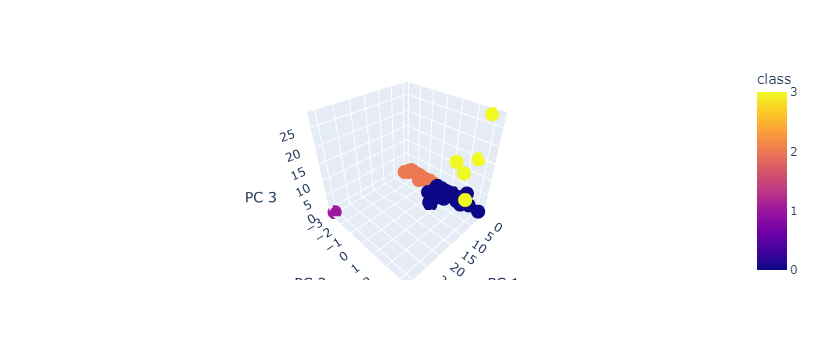

In [126]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x="PC 1", y="PC 2", z="PC 3", color="class", hover_name="CoinName", hover_data=["Algorithm"])
fig.show()

Table of Tradable Cryptocurrencies

In [127]:
# Table with tradable cryptos
clustered_df.hvplot.table(columns=['CoinName', "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"])

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [128]:
# Print the total number of tradable cryptocurrencies
total_trade_coins = len(clustered_df.CoinName)
print(f"The total number of tradable cryptocurrencies are {total_trade_coins}.")

The total number of tradable cryptocurrencies are 685.


Scatter Plot with Tradable Cryptocurrencies

In [129]:
# Scale data to create the scatter plot
scaler = MinMaxScaler()

clustered_columns = ["TotalCoinsMined", "TotalCoinSupply"]
x = clustered_df[clustered_columns].values
x_scaled = scaler.fit_transform(x)

In [130]:
# Create a dataframe with scaled data
tradable_coins_df = pd.DataFrame(
    data=x_scaled, columns=clustered_columns
)
tradable_coins_df.head()

,TotalCoinsMined,TotalCoinSupply
0,0.005942,4.553649e-16
1,0.007002,5.767956e-09
2,0.005942,0.000000e+00
3,0.035342,3.406122e-06
4,0.005960,2.276825e-10


In [131]:
# Drop the existing columns `TotalCoinsMined` and `TotalCoinSupply` from the `clustered_df` dataframe to avoid duplicates.
clustered_df.drop(columns=clustered_columns, inplace=True)
clustered_df.head()

,Algorithm,ProofType,PC 1,PC 2,PC 3,class,CoinName
Ticker,,,,,,,
42,Scrypt,PoW/PoS,-0.311909,1.223115,-0.395829,0,42 Coin
404,Scrypt,PoW/PoS,-0.298060,1.221307,-0.396157,0,404Coin
808,SHA-256,PoW/PoS,-0.140324,0.793454,-0.275268,0,808
1337,X13,PoW/PoS,0.287620,1.871280,-0.456194,0,EliteCoin
BTC,SHA-256,PoW,-0.161219,-1.456436,0.085173,2,Bitcoin


In [132]:
# Concate the two dataframes `clustered_df` and `tradable_coins_df`
clustered_tradable_df = pd.concat([clustered_df, tradable_coins_df], axis='columns', join='inner')
clustered_tradable_df.head()

,Algorithm,ProofType,PC 1,PC 2,PC 3,class,CoinName,TotalCoinsMined,TotalCoinSupply


In [133]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
fig2 = alt.Chart(clustered_tradable_df).mark_circle(
    size=100
).encode(
    alt.X("TotalCoinsMined", title="TotalCoinsMined", scale=alt.Scale(zero=False)),
    alt.Y("TotalCoinSupply", title="TotalCoinSupply", scale=alt.Scale(zero=False)),
    color="CoinName",
    tooltip=["CoinName", "TotalCoinsMined", "TotalCoinSupply"]
).properties(
    height=300,
    width=500,
    title="TotalCoinsMined versus TotalCoinSupply").interactive()
fig2

C:\Users\gregg\Anaconda3\envs\pyvizenv\lib\site-packages\altair\utils\core.py:221: UserWarning:

I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.



alt.Chart(...)